In [116]:
import ibis
import altair as alt
import ibis_vega_transform

In [117]:
con = ibis.postgres.connect(
    user='sai',
    password='',
    host='localhost',
    port=5432,
    database='scalable_vega',
)
table_cars = con.table("cars")
temp = table_cars.execute()

In [118]:
#cars_average or cars_average_transform
c = alt.Chart(table_cars).mark_bar().encode(
    x='cylinders',
    y='average(miles_per_gallon):Q'
)
c

<IPython.core.display.JSON object>

alt.Chart(...)

In [119]:
#cars_count
c = alt.Chart(table_cars).mark_bar().encode(
    x='cylinders',
    y='count(miles_per_gallon):Q'
)
c

<IPython.core.display.JSON object>

alt.Chart(...)

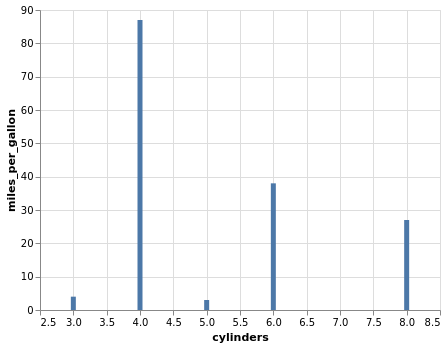

In [120]:
#cars_distinct
import pandas as pd
see = temp.groupby("cylinders").miles_per_gallon.nunique()
see = see.reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

In [133]:
#cars_histogram
WIDTH = 600
HEIGHT = 400
alt.Chart(table_cars, width=WIDTH, height=HEIGHT).mark_bar().encode(
    alt.X("miles_per_gallon:Q", bin=alt.Bin(maxbins=11)),
    y='count()',
)

<IPython.core.display.JSON object>

alt.Chart(...)

In [135]:
#cars_marks
c = alt.Chart(table_cars).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

<IPython.core.display.JSON object>

alt.Chart(...)

In [137]:
#cars_max
c = alt.Chart(table_cars).mark_bar().encode(
    x='cylinders',
    y='max(miles_per_gallon):Q'
)
c

<IPython.core.display.JSON object>

alt.Chart(...)

In [142]:
#cars_mean
c = alt.Chart(table_cars).mark_bar().encode(
    x='cylinders',
    y='mean(miles_per_gallon):Q'
)
c

<IPython.core.display.JSON object>

alt.Chart(...)

In [143]:
#cars_min
c = alt.Chart(table_cars).mark_bar().encode(
    x='cylinders',
    y='min(miles_per_gallon):Q'
)
c

<IPython.core.display.JSON object>

alt.Chart(...)

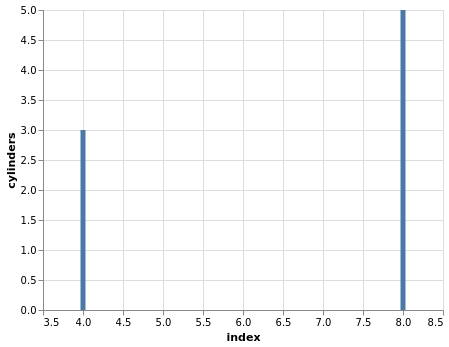

In [159]:
#cars_missing
see = temp[temp['miles_per_gallon'].isna()]['cylinders'].value_counts().reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='index',
    y='cylinders'
)
c

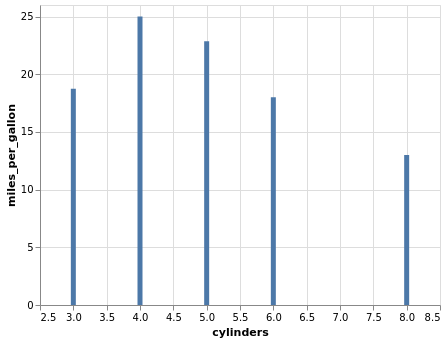

In [167]:
#cars_q1
see = temp.groupby('cylinders').miles_per_gallon.quantile(.25).reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

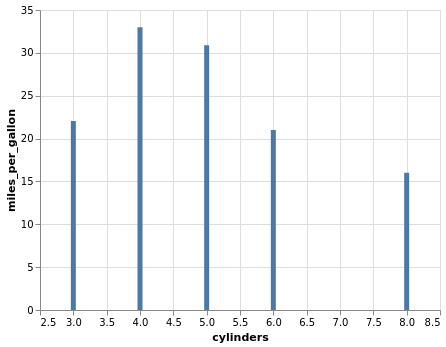

In [168]:
#cars_q1
see = temp.groupby('cylinders').miles_per_gallon.quantile(.75).reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

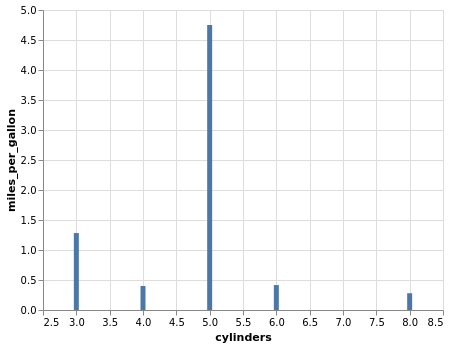

In [171]:
#cars_stderr
see = temp.groupby('cylinders').miles_per_gallon.sem().reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

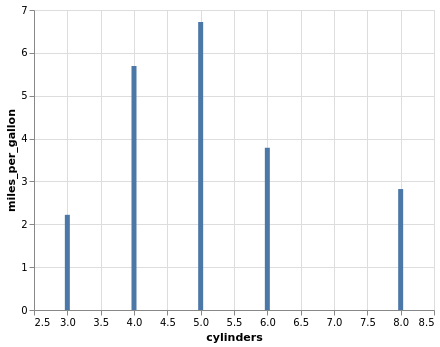

In [172]:
#cars_stdevp
import numpy as np
see = temp.groupby('cylinders').miles_per_gallon.agg(np.std, ddof=0).reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

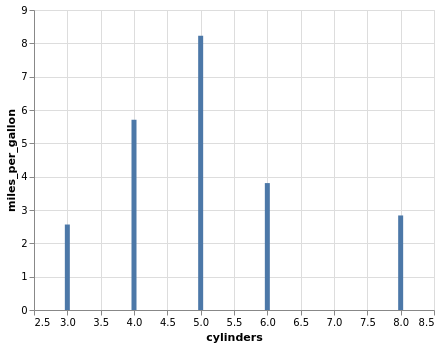

In [173]:
#cars_stdev
import numpy as np
see = temp.groupby('cylinders').miles_per_gallon.agg(np.std, ddof=1).reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

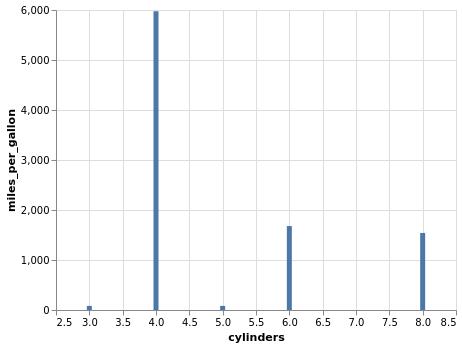

In [178]:
#cars_sum
see = temp.groupby('cylinders').miles_per_gallon.sum().reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

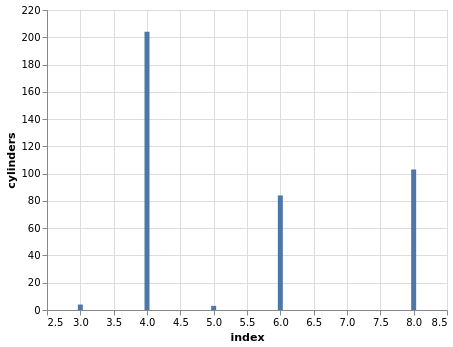

In [181]:
#cars_valid
see = temp[temp['miles_per_gallon'].notna()]['cylinders'].value_counts().reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='index',
    y='cylinders'
)
c

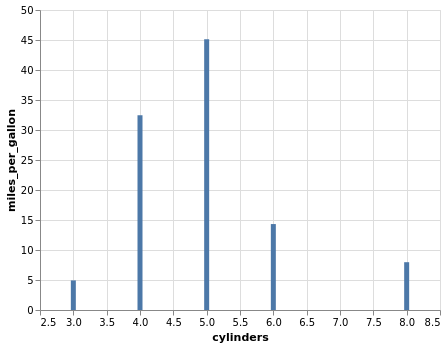

In [183]:
#cars_stdevp
import numpy as np
see = temp.groupby('cylinders').miles_per_gallon.agg(np.var, ddof=0).reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c

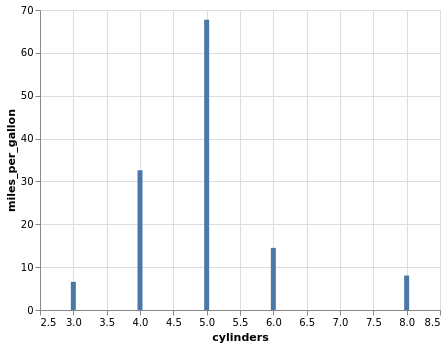

In [184]:
#cars_stdev
import numpy as np
see = temp.groupby('cylinders').miles_per_gallon.agg(np.var, ddof=1).reset_index()
c = alt.Chart(see).mark_bar().encode(
    x='cylinders',
    y='miles_per_gallon'
)
c